In [1]:
# this path append is for binder only
import sys
sys.path.append("../../")

#spectrome modules
# from spectrome.forward import runforward, runforward_spatialcorrelation_topalpha
from spectrome.utils import functions, path
from spectrome.brain import Brain
from spectrome.stability import localstability_microintensity_allrois
# from spectrome.stability import localstability
# from spectrome.forward import network_transfer_macrostable_microintensity_extrastimulus as nt
# from spectrome.forward import network_transfer_macrostable_microintensity as nt_nostimulus
from spectrome.forward import network_transfer_macrostable as nt
from spectrome.forward import runforward_spatialcorrelation_mahalanobis 
from spectrome.forward import runforward_spatialcorrelation_old
from spectrome.forward import runforward_spatialcorrelation_topalpha

#generic modules
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import pickle as pkl
from scipy import stats
from scipy.stats import pearsonr
from scipy.io import loadmat
from sklearn.preprocessing import minmax_scale

pd.DataFrame.iteritems = pd.DataFrame.items

plt.rcParams.update({
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

data_dir = path.get_data_path()
# # create spectrome brain:
brain = Brain.Brain()
brain.add_connectome(data_dir) # grabs distance matrix
# # re-ordering for DK atlas and normalizing the connectomes:
brain.reorder_connectome(brain.connectome, brain.distance_matrix)
brain.reducedConnectome = brain.connectome

In [25]:
C = brain.reducedConnectome

C = C/np.linalg.norm(C)

rowdegree = np.transpose(np.sum(C, axis=1))
coldegree = np.sum(C, axis=0)

# degree = rowdegree + coldegree

# eps = min([i for i in degree if i > 0])
degree = (rowdegree + coldegree)/2
eps = np.percentile(degree,5)
w_spat = 0.1
nroi = 68
L22 = np.divide(1, np.sqrt(np.multiply(rowdegree, coldegree)) + eps)
Cc = np.matmul(np.diag(L22), C)
# Cc = Cc/np.linalg.norm(Cc)
Cc2 = Cc[0:68,0:68] + np.eye(nroi)
# Cc2 = 1.0*np.matmul(np.diag(L22), C)[0:68,0:68] + 1*np.eye(nroi)

# Cc2 = Cc2/np.linalg.norm(Cc2)

#     Extra lines to match previous spatial R
rowdegree = np.transpose(np.sum(Cc2, axis=1))
coldegree = np.sum(Cc2, axis=0)

# degree = rowdegree + coldegree
# replace this with (rowdegree + coldegree)/2
# take 5th percentile rowdegree

# eps = min([i for i in degree if i > 0])

# L23 = np.divide(1, np.sqrt(np.multiply(rowdegree, coldegree)) + eps)
L23 = np.divide(1, np.sqrt(np.multiply(rowdegree, coldegree)))
Cc3 = np.matmul(np.diag(L23), Cc2)

Cc3 = Cc3/np.linalg.norm(Cc3)  

Cc3 = Cc2

0.05095650444559886 0.034376746647785075 0.7562427734819589


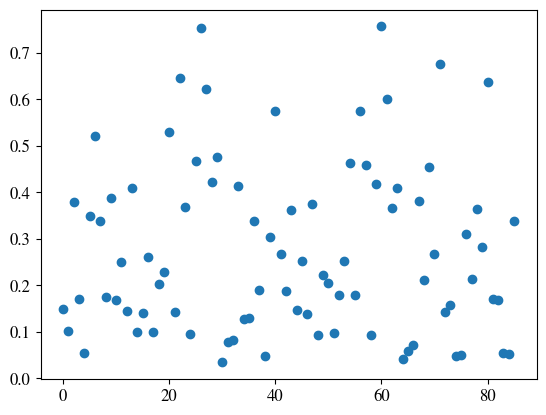

In [37]:
print(eps,np.min(degree),np.max(degree))
plt.scatter(range(len(degree)),degree)

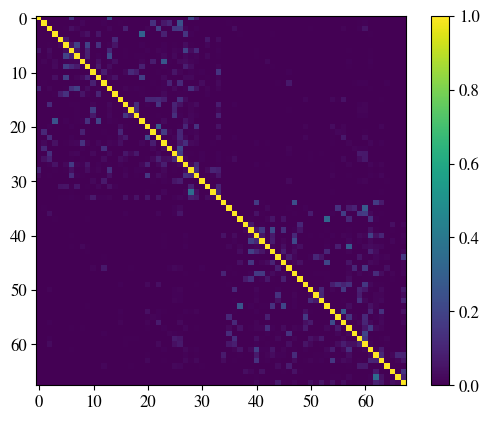

In [26]:
plt.imshow(Cc3)
plt.colorbar()

In [27]:
np.linalg.norm(Cc3)

8.553511963541489

In [28]:
np.linalg.norm(100*Cc3)

855.3511963541488

In [29]:
Cc3[0,:10]

array([1.00000000e+00, 8.78291077e-05, 2.21329352e-03, 5.88455022e-04,
       0.00000000e+00, 3.60099342e-04, 1.53609596e-01, 7.81679059e-03,
       2.61730741e-03, 1.49309483e-03])

In [32]:
np.sum(Cc3[0,:])

1.7371075433170962

Text(0, 0.5, 'sum of SC row')

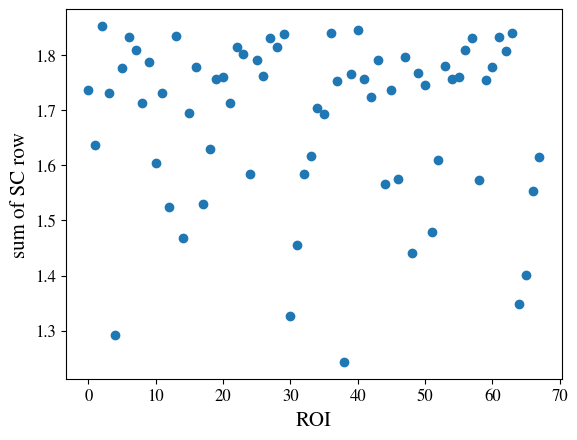

In [33]:
plt.scatter(range(68),[np.sum(Cc3[i,:]) for i in range(68)])
plt.xlabel('ROI',fontsize=15)
plt.ylabel('sum of SC row',fontsize=15)

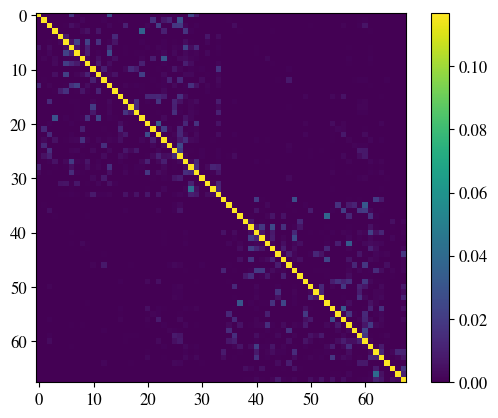

In [34]:
plt.imshow(Cc3/np.linalg.norm(Cc3))
plt.colorbar()